<a href="https://colab.research.google.com/github/bravoeight98/language_Preprocesseing/blob/main/corpus_training_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialization

Activating google drive for dataset retrival

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Call necessary libraries. Call dataset from drive

In [ ]:
import nltk
import pandas as pd
from nltk import ngrams
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk import FreqDist
from nltk.corpus import stopwords

text = open('/content/drive/MyDrive/corpus_train/corpus_train_en.txt', 'r').read()  # Open given text

# Bigram & Trigram

In [ ]:
# Function n_gram: splits the words in order to given parameter
# Parameter n: it's the "n" number for "n-gram"
def n_gram(n):                                             
    n_grams = ngrams(text.split(), n)
    return n_grams

In [ ]:
sentences = []
df_frequency = []

In [ ]:
# Function frequency: counts the frequency of the each "n-gram" output
# Parameter grammed: it takes the function "n_gram"s return as value. Briefly, the grammed text.
def frequency(grammed):
    sentences.clear()
    df_frequency.clear()
    freq = nltk.FreqDist(grammed)
    for k, v in freq.items():
        sentences.append(k)                     # Sentences is a list, stores the grams(ignores duplicates)
        df_frequency.append(v)                  # df_frequency is a list, stores the frequency of grams

In [ ]:
# Function create_plot: it creates a plot for given grams
# Parameter num: it's a number to send it to "n_gram" function
def create_plot(num):
    frequency(n_gram(num)) # Send "num" parameter to "n_gram func." and send the result to "frequency func."

    gram_frame = pd.DataFrame(sentences)       # gram_frame is the data frame to store grams and freq.

    gram_frame['frequencies'] = df_frequency
    if num == 2:
        gram_frame.columns = ['first', 'second', 'frequencies']
    if num == 3:
        gram_frame.columns = ['first', 'second', 'third', 'frequencies']

    gram_frame.sort_values("frequencies", axis=0, ascending=False, inplace=True, na_position='last')

    gram_frame = gram_frame.head(20)            # Only take the top 20 of gram_frame

    total = sum(df_frequency)

    gram_frame["ratio"] = gram_frame['frequencies'].div(total)   # Additional, ratio is added

    plt.rcdefaults()
    fig, ax = plt.subplots()

    if num == 2:
        grams = gram_frame["first"] + " " + gram_frame["second"]
    if num == 3:
        grams = gram_frame["first"] + " " + gram_frame["second"] + " " + gram_frame["third"]

    # Create plot
    y_pos = np.arange(len(grams))
    performance = gram_frame["frequencies"]

    ax.barh(y_pos, performance)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(grams)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Frequency')
    ax.set_title('2-3 grams')

    plt.show()
    display(gram_frame)

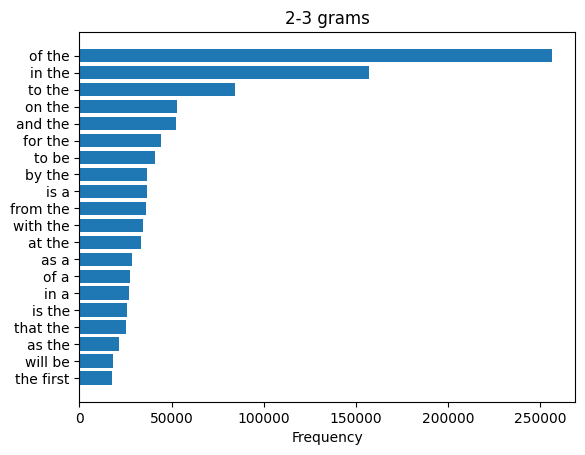

,first,second,frequencies,ratio
365,of,the,256300,0.008260
467,in,the,157071,0.005062
169,to,the,84250,0.002715
1748,on,the,52752,0.001700
500,and,the,52207,0.001683
415,for,the,44234,0.001426
189,to,be,40953,0.001320
516,by,the,36860,0.001188
1141,is,a,36831,0.001187
222,from,the,36081,0.001163


In [ ]:
create_plot(2)   # Create plot for bigram 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


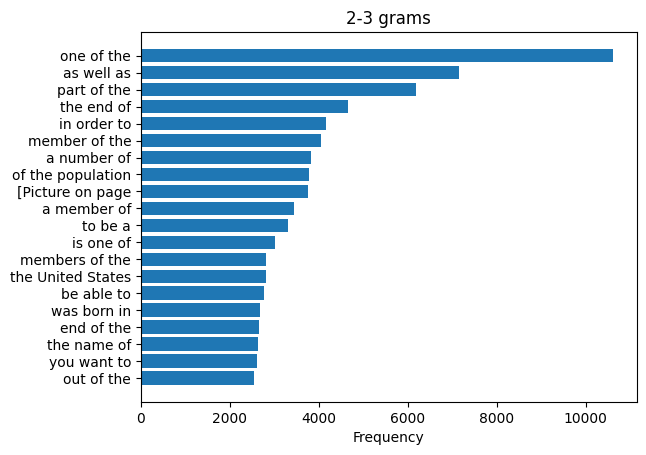

,first,second,third,frequencies,ratio
24994,one,of,the,10622,0.000342
1638,as,well,as,7165,0.000231
1175,part,of,the,6196,0.000200
9383,the,end,of,4653,0.000150
12861,in,order,to,4169,0.000134
782,member,of,the,4058,0.000131
4033,a,number,of,3822,0.000123
18347,of,the,population,3791,0.000122
1772,[Picture,on,page,3748,0.000121
781,a,member,of,3452,0.000111


In [ ]:
create_plot(3)   # Create plot for trigram

#Using Zipf's law, finding the word frequencies.

In [ ]:
#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#To display the full text column instead of truncating one
pd.set_option('display.max_colwidth', -1)

In [ ]:
# reading given csv file 
# and creating dataframe
df = pd.read_csv("/content/drive/MyDrive/corpus_train/corpus_train_en.txt",header = None, on_bad_lines='skip')
  
# adding column headings
df.columns = ['text']
  
# store dataframe into csv file
df.to_csv("/content/drive/MyDrive/corpus_train/corpus_train_en.csv", index = None)

df['text'] = df.fillna({'text':''})

In [ ]:
#Head of the dataframe
df.head()

,text
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.
1,trump
2,overrides
3,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:
4,Club.


In [ ]:
#Dimension of the dataframe
df.shape

(1735612, 1)

In [ ]:
#Python provides a constant called string.punctuation that provides a great list of punctuation characters. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def remove_punctuations(input_col):
    """To remove all the punctuations present in the text.Input the text column"""
    table = str.maketrans('','',string.punctuation)
    return input_col.translate(table)

In [ ]:
#Applying the remove_punctuation function
df['text'] = df['text'].apply(remove_punctuations)

In [ ]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for sent in text_col:
        corpus += sent
    return corpus

In [ ]:
#Building the corpus
corpus = build_corpus(df['text'])

In [ ]:
#Converting all the words into lowercase
corpus = corpus.lower()

In [ ]:
#Some part of the Text Corpus
corpus[:1000]

'better o  guaranteeing that every individual will be free to do as he wishes inevitably shortchanges equalitytrumpoverridesother twitter users went on commenting on jallouds interview for aljazeera and his attitudeclubso let us investigate on triali wouldnt tell anybody even if he hadnt said thatto give the bear a great big hug1 peter 55 the way we treat fellow worshipers has a direct bearing on our relationship with god 1 john 420responsibilitieshe eats nothing other than fruitmy names ajaxamong the members of this group was v n chatterjee of london india housemanipuri dance was brought to the horizon of outside world by rabindranath tagoreriggedfocus under mousebow tiethe space to place a reading table should have sufficient light and airsword2 the arbitral tribunal shall deal with a dispute submitted to it as quickly as possibleholesbuild up yourself and other faithful family members1 ki 1736 we have faith that jehovah can maneuver matters so that we too have what we needpublishers

In [ ]:
#Splitting the entire corpus
corpus = corpus.split()

In [ ]:
#Observing the first few words
print(corpus[:50])

['better', 'o', 'guaranteeing', 'that', 'every', 'individual', 'will', 'be', 'free', 'to', 'do', 'as', 'he', 'wishes', 'inevitably', 'shortchanges', 'equalitytrumpoverridesother', 'twitter', 'users', 'went', 'on', 'commenting', 'on', 'jallouds', 'interview', 'for', 'aljazeera', 'and', 'his', 'attitudeclubso', 'let', 'us', 'investigate', 'on', 'triali', 'wouldnt', 'tell', 'anybody', 'even', 'if', 'he', 'hadnt', 'said', 'thatto', 'give', 'the', 'bear', 'a', 'great', 'big']


In [ ]:
def plot_word_frequency(words,top_n=10):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Including STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plot = sns.barplot(labels,counts)
    return plot

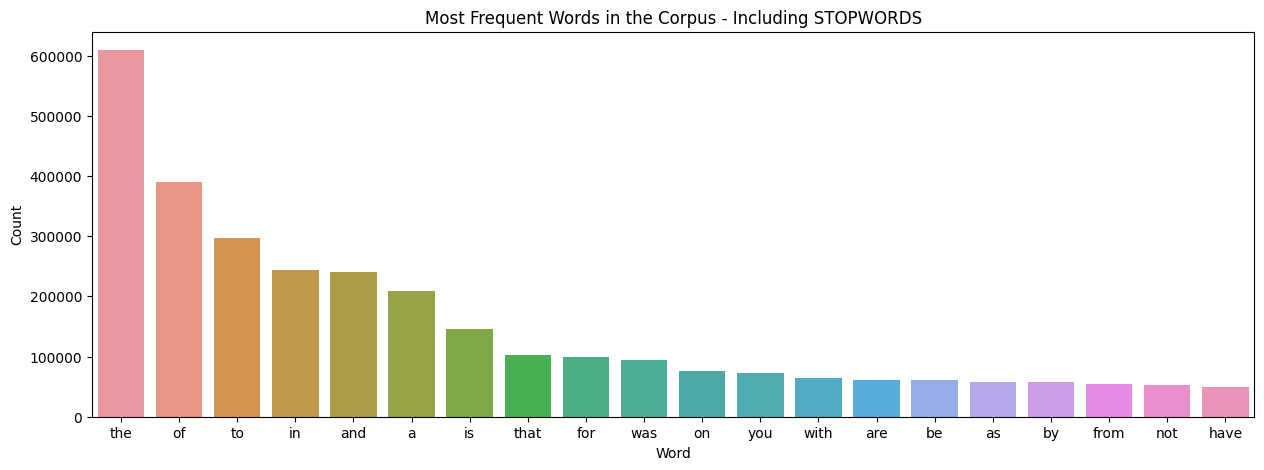

In [ ]:
plot_word_frequency(corpus,20)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
corpus_without_stop = [word for word in corpus if word not in stopwords.words("english")]

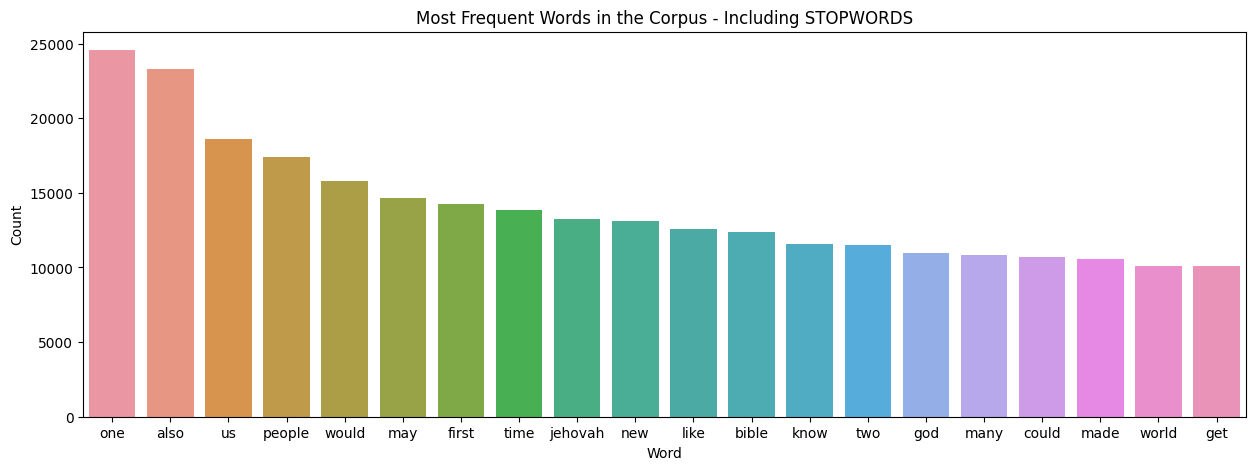

In [ ]:
plot_word_frequency(corpus_without_stop,20)

In [ ]:
#Creating a FreqDist object
fd=FreqDist()

In [ ]:
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

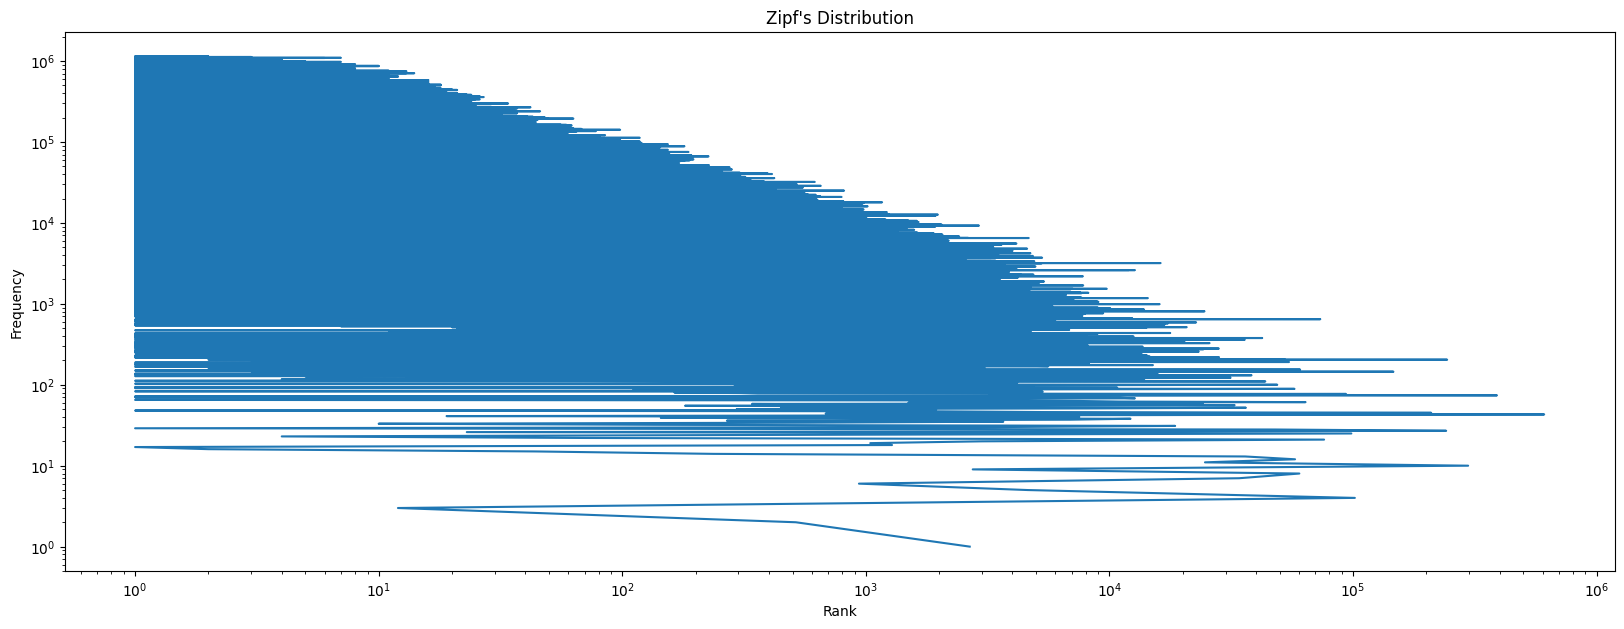

In [ ]:
#Plotting the distribution
plt.figure(figsize=(20,7))
plt.loglog(freqs,ranks)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Distribution")
plt.show()

#stemming and lemmatisation

In [ ]:
import re
import nltk
import spacy
import string
pd.options.mode.chained_assignment = None
from nltk.stem.porter import PorterStemmer

full_df = pd.read_csv("/content/drive/MyDrive/corpus_train/corpus_train_en.csv", nrows=5000)
df = full_df[["text"]]
df["text"] = df["text"].astype(str)
full_df.head()

,text
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.
1,trump
2,overrides
3,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:
4,Club.


In [ ]:
df["text_lower"] = df["text"].str.lower()
df.head()

,text,text_lower
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.,better o . guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.
1,trump,trump
2,overrides,overrides
3,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,other twitter users went on commenting on jalloud's interview for al-jazeera and his attitude:
4,Club.,club.


In [ ]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text"].apply(lambda text: stem_words(text))
df.head()

,text,text_lower,text_stemmed
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.,better o . guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.,better o . guarante that everi individu will be free to do as he wish inevit short-chang equality.
1,trump,trump,trump
2,overrides,overrides,overrid
3,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,other twitter users went on commenting on jalloud's interview for al-jazeera and his attitude:,other twitter user went on comment on jalloud' interview for al-jazeera and hi attitude:
4,Club.,club.,club.


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["text"].apply(lambda text: lemmatize_words(text))
df.head()

,text,text_lower,text_stemmed,text_lemmatized
0,better o . Guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.,better o . guaranteeing that every individual will be free to do as he wishes inevitably short-changes equality.,better o . guarante that everi individu will be free to do as he wish inevit short-chang equality.,better o . Guaranteeing that every individual will be free to do a he wish inevitably short-changes equality.
1,trump,trump,trump,trump
2,overrides,overrides,overrid,override
3,Other Twitter users went on commenting on Jalloud's interview for Al-Jazeera and his attitude:,other twitter users went on commenting on jalloud's interview for al-jazeera and his attitude:,other twitter user went on comment on jalloud' interview for al-jazeera and hi attitude:,Other Twitter user went on commenting on Jalloud's interview for Al-Jazeera and his attitude:
4,Club.,club.,club.,Club.


#Finding sentence/instance repetition 

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
lines_seen = set() # holds lines already seen
my_list = []
with open("/content/drive/MyDrive/corpus_train/corpus_train_en.txt", "r+") as f:
    d = f.readlines()
    f.seek(0)
    for i in d:
        if i not in lines_seen:
            f.write(i)
            lines_seen.add(i)
            my_list.append(i)

with open('repeated_sentence.txt', 'w') as f:
    for item in my_list:
        f.write("%s\n" % item)            


#Finding out the Tf-Idf measurements

In [2]:
import pandas
import functools
import math
import re
pandas.set_option('display.max_rows', 5000)
pandas.set_option('display.max_columns', 5000)
pandas.set_option('display.width', 10000)
pandas.set_option("max_column", None)

In [3]:
corpus = open('/content/drive/MyDrive/corpus_train/corpus_train_en.txt', 'r').read()  # Open given text

In [4]:
corpus_list = corpus.split(".")
for item in corpus_list:
    index = corpus_list.index(item)
    corpus_list[index] = corpus_list[index].strip()
    if item == "":
        corpus_list.remove("")

KeyboardInterrupt: ignored

In [ ]:
dictionary_of_bag_of_words = {}  # bowA

for item in corpus_list:
    dictionary_of_bag_of_words[str(corpus_list.index(item))] = item.split(" ")

In [ ]:
print(dictionary_of_bag_of_words)
for key in dictionary_of_bag_of_words:
    print(f"Key:: {key}\t Value:  {dictionary_of_bag_of_words[key]}")

In [ ]:
all_word_set = functools.reduce(lambda set1, set2: set(set1).union(set(set2)),
                                list(dictionary_of_bag_of_words.values()))
print(all_word_set, len(all_word_set))

print(list(dictionary_of_bag_of_words.values()))

In [ ]:
dictionary_of_word_set = {}  # wordDictA
for item in corpus_list:
    dictionary_of_word_set[str(corpus_list.index(item))] = dict.fromkeys(
        all_word_set, 0)

In [ ]:
for key in dictionary_of_word_set:
    print(f"Key:: {key}\t Value:  {dictionary_of_word_set[key]}")

In [ ]:
for bow_as_key in dictionary_of_bag_of_words:
    iterable = dictionary_of_bag_of_words[bow_as_key]
    for item in iterable:
        x = dictionary_of_word_set[str(bow_as_key)]
        x[str(item)] += 1

In [ ]:
for key in dictionary_of_word_set:
    print(f"Key:: {key}\t\nValue:  {dictionary_of_word_set[key]}\n\n")

In [ ]:
list_of_dictionary_of_word_set = list(dictionary_of_word_set.values())
# print(list_of_dictionary_of_word_set)
data_drame = pandas.DataFrame(list_of_dictionary_of_word_set)

In [ ]:
data_drame


In [ ]:
def computeTF(dictionary_of_word, bag_Of_words):
    tf_dictionary_to_return = {}
    length_of_doc = len(bag_Of_words)
    for word, count in dictionary_of_word.items():
        tf_dictionary_to_return[word] = count / float(length_of_doc)

    return tf_dictionary_to_return


def computerIDF(_corpus_list):
    idf_dictionary_to_return = dict.fromkeys(_corpus_list[0].keys(), 0)
    N = len(_corpus_list)
    for document_dict in _corpus_list:
        for word, val in document_dict.items():
            if val > 0:
                idf_dictionary_to_return[word] += 1

    # Final processing of idf_dictionary_to_return
    for word, val in idf_dictionary_to_return.items():
        idf_dictionary_to_return[word] = math.log(N / float(val))

    return idf_dictionary_to_return


def calculateTF_IDF(tf_dict, idf_dict):
    tfidf_to_return = {}
    for word, val in tf_dict.items():
        tfidf_to_return[word] = val * idf_dict[word]

    return tfidf_to_return

In [ ]:
dictionary_of_word_set_for_tf = dictionary_of_word_set.copy()


In [ ]:
for key, val in dictionary_of_word_set.items():
    x = computeTF(dictionary_of_word_set[key], dictionary_of_bag_of_words[key])
    dictionary_of_word_set_for_tf[key] = x

In [ ]:
for key in dictionary_of_word_set_for_tf:
    print(f"Key:: {key}\t\n Value:  {dictionary_of_word_set_for_tf[key]}\n\n")

In [ ]:
for key in dictionary_of_word_set_list:
    print(key)

In [ ]:
idfs = computerIDF(dictionary_of_word_set_list)
tf_idf_dictionary = dict.fromkeys(dictionary_of_word_set_for_tf.keys(), 0)
for key, val in dictionary_of_word_set_for_tf.items():
    tf_idf_dictionary[key] = calculateTF_IDF(
        dictionary_of_word_set_for_tf[key], idfs)

In [ ]:
for key in tf_idf_dictionary:
    print(f"Key:: {key}\t\n Value:  {tf_idf_dictionary[key]}\n\n")

In [ ]:
tf_idf_list = []
for key, val in tf_idf_dictionary.items():
    tf_idf_list.append(tf_idf_dictionary[key])

In [ ]:
data_drame_tf_idf = pandas.DataFrame(tf_idf_list)
print("TF-IDF Data Frame\n==================\n")
data_drame_tf_idf

Bangla 

#Text Preprocessing

Removing Punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    punctuation_list = str(string.punctuation) + "।"
    txt_nopunct = "".join([c for c in txt if c not in punctuation_list])
    return txt_nopunct

In [ ]:
def remove_garbage(a):
  a= "".join(i for i in a if i in ["।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  removed=" ".join(a.split())
  return removed

In [ ]:
cleaned_data['Removed Puncutation'] = cleaned_data['content'].apply(lambda x:remove_punctuation(x))
cleaned_data.head()

,content,label,Removed Puncutation
0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান কয়ে...
1,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
4,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...


In [ ]:
cleaned_data['remove Eng'] = cleaned_data['Removed Puncutation'].apply(lambda x:remove_garbage(x))
cleaned_data

,content,label,Removed Puncutation,remove Eng
0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান কয়ে...,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান কয়ে...
1,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
4,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...
...,...,...,...,...
995,"ঈদের ছুটি মানেই রাস্তাঘাট ফাঁকা, মানুষের ভীড় আ...",0.0,ঈদের ছুটি মানেই রাস্তাঘাট ফাঁকা মানুষের ভীড় আর...,ঈদের ছুটি মানেই রাস্তাঘাট ফাঁকা মানুষের ভীড় আর...
996,"ঢাকার রাস্তার জ্যাম ঢাকার গর্ব, গিনেসবুকে নাম ...",0.0,ঢাকার রাস্তার জ্যাম ঢাকার গর্ব গিনেসবুকে নাম ত...,ঢাকার রাস্তার জ্যাম ঢাকার গর্ব গিনেসবুকে নাম ত...
997,আসন্ন জাতীয় নির্বাচনে নৌকা মার্কায় ভোট দিতে পা...,0.0,আসন্ন জাতীয় নির্বাচনে নৌকা মার্কায় ভোট দিতে পা...,আসন্ন জাতীয় নির্বাচনে নৌকা মার্কায় ভোট দিতে পা...
998,নির্বাচনের সময় নেতাকর্মীরা সাধারণত নিজেদের দল ...,0.0,নির্বাচনের সময় নেতাকর্মীরা সাধারণত নিজেদের দল ...,নির্বাচনের সময় নেতাকর্মীরা সাধারণত নিজেদের দল ...


Removing URLs 

In [ ]:
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

Removing stopwords



In [ ]:
stop = set(stopwords.words("bengali"))

def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    
    return " ".join(text)

Applying text preprocessing



In [ ]:
cleaned_data["content"] = cleaned_data["content"].apply(remove_stopwords)
cleaned_data["content"] = cleaned_data.content.apply(lambda x: remove_URL(x))

Obseving the processed datas

In [ ]:
%load_ext google.colab.data_table
cleaned_data.head(5)


,content,label,Removed Puncutation,remove Eng
0,ক্রিকেট বিশ্বের চমকের নাম আফগানিস্তান। বছরে পা...,1.0,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান কয়ে...,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান কয়ে...
1,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2,রাজধানীতে মাদক বিরোধী অভিযান পরিচালনা ঢাকা মেট...,1.0,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...
3,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
4,ভারত পাইপ লাইনের সরাসরি দেশে জ্বালানি তেল সরবর...,1.0,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...


In [ ]:
cleaned_data.content


0      ক্রিকেট বিশ্বের চমকের নাম আফগানিস্তান। বছরে পা...
1      এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...
2      রাজধানীতে মাদক বিরোধী অভিযান পরিচালনা ঢাকা মেট...
3      সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...
4      ভারত পাইপ লাইনের সরাসরি দেশে জ্বালানি তেল সরবর...
                             ...                        
995    ঈদের ছুটি মানেই রাস্তাঘাট ফাঁকা, মানুষের ভীড় জ...
996    ঢাকার রাস্তার জ্যাম ঢাকার গর্ব, গিনেসবুকে নাম ...
997    আসন্ন জাতীয় নির্বাচনে নৌকা মার্কায় ভোট পারছেন ...
998    নির্বাচনের সময় নেতাকর্মীরা সাধারণত দল সম্পর্কে...
999    পরিবারের সাথে ঈদ উদযাপন ২৭ই আগষ্ট সকালের ফ্লাই...
Name: content, Length: 2000, dtype: object